In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Sample - Superstore Sales (Excel).xls")
data.head(3)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.57,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03


In [3]:
data.shape

(8399, 21)

# Check Null Value in Our Data

In [4]:
data.isnull().sum()

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

In [5]:
# Fill Null Value Using Mean

In [6]:
data["Product Base Margin"] = data["Product Base Margin"].fillna(data["Product Base Margin"].mean())

In [7]:
data.isnull().sum()

Row ID                  0
Order ID                0
Order Date              0
Order Priority          0
Order Quantity          0
Sales                   0
Discount                0
Ship Mode               0
Profit                  0
Unit Price              0
Shipping Cost           0
Customer Name           0
Province                0
Region                  0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Name            0
Product Container       0
Product Base Margin     0
Ship Date               0
dtype: int64

# Finding The Which Order Priority is High

In [8]:
data["Order Priority"].value_counts()

Order Priority
High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: count, dtype: int64

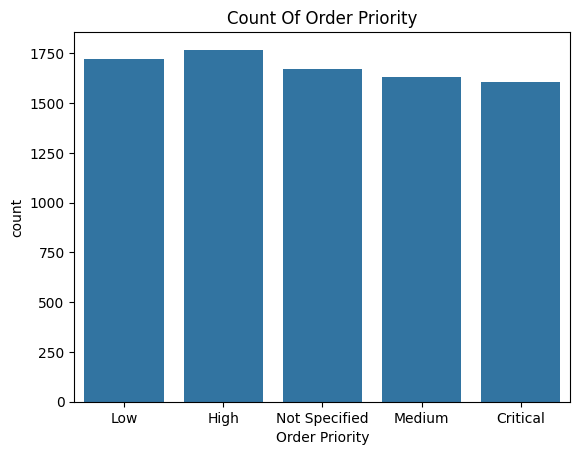

In [9]:
sns.countplot(data=data , x="Order Priority")
plt.title("Count Of Order Priority")
plt.show()

# Finding out which shipping mode gets to more orders

In [10]:
data["Ship Mode"].value_counts()

Ship Mode
Regular Air       6270
Delivery Truck    1146
Express Air        983
Name: count, dtype: int64

In [11]:
x = data["Ship Mode"].value_counts().index
y = data["Ship Mode"].value_counts().values

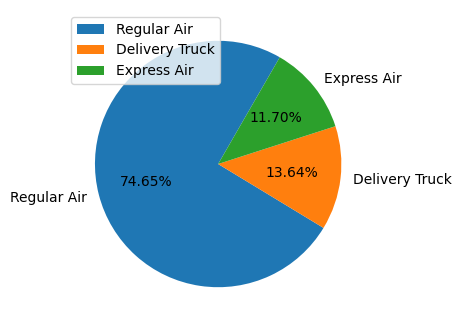

In [12]:
plt.figure(figsize=(5,4))
plt.pie(y, labels=x, startangle=60 , autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

# Finding Out Shiping Mode By Product Category

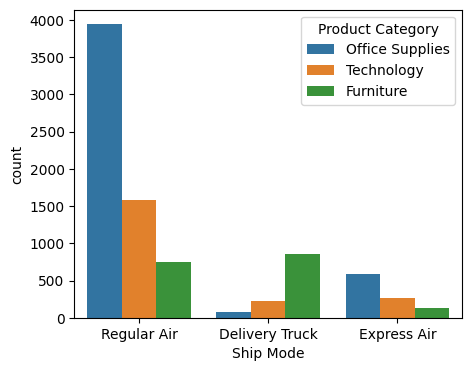

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(data=data , x="Ship Mode" , hue="Product Category")
plt.show()

# Finding Out High Customer Segment

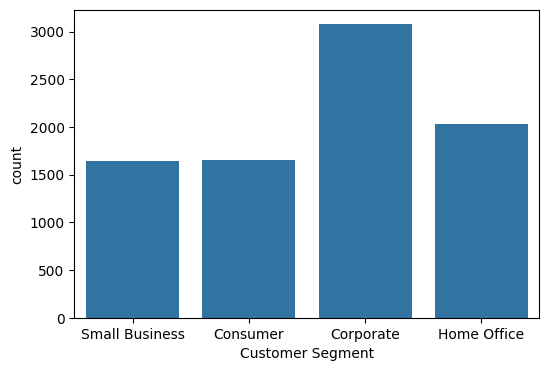

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=data , x="Customer Segment")
plt.show()

# Finding Out Higher Selling Products by Products Category

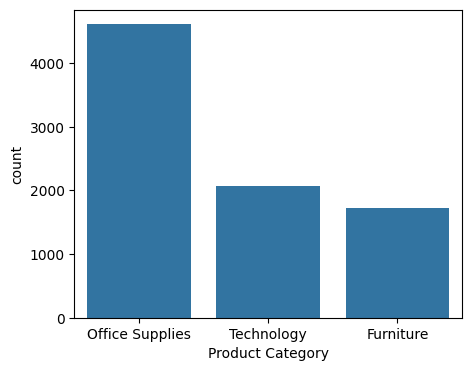

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(data=data , x="Product Category")
plt.show()

# Finding Out More Selling Product in Sub Product Category

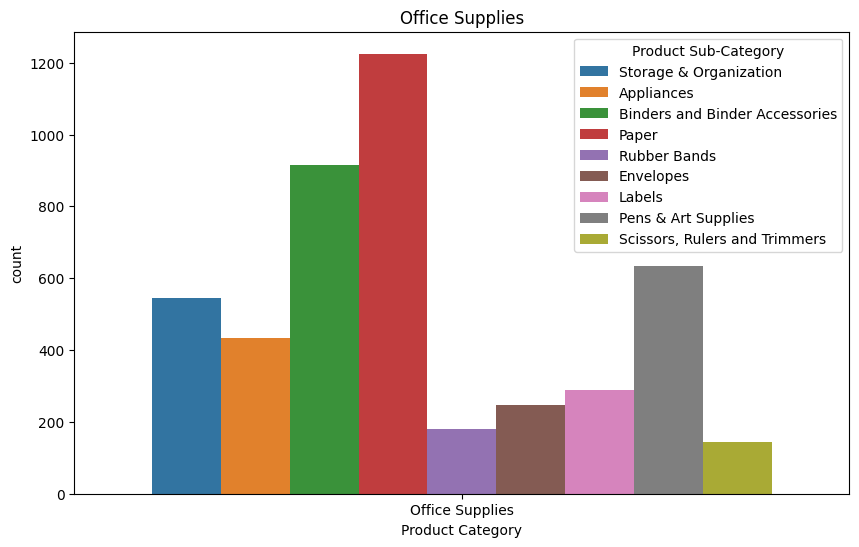

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=data[data["Product Category"]=="Office Supplies"] , x="Product Category" , hue="Product Sub-Category")
plt.title("Office Supplies")
plt.show()

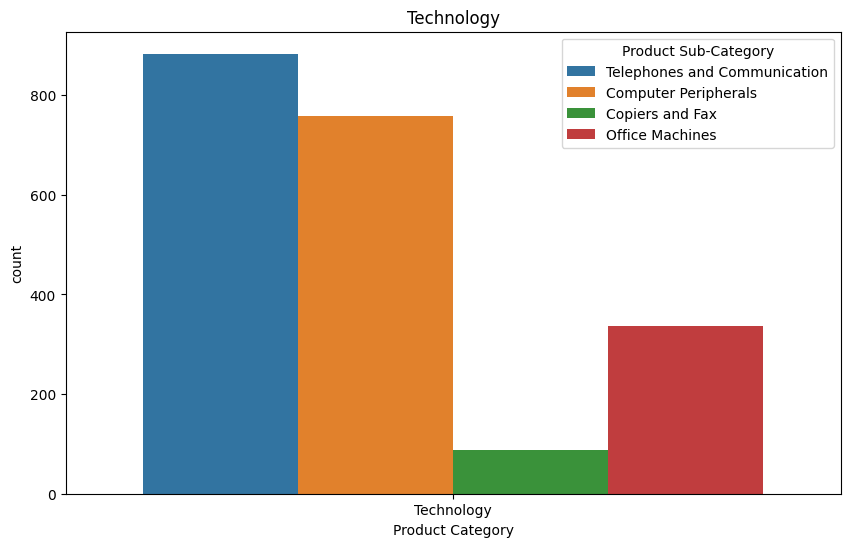

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=data[data["Product Category"]=="Technology"] , x="Product Category" , hue="Product Sub-Category")
plt.title("Technology")
plt.show()

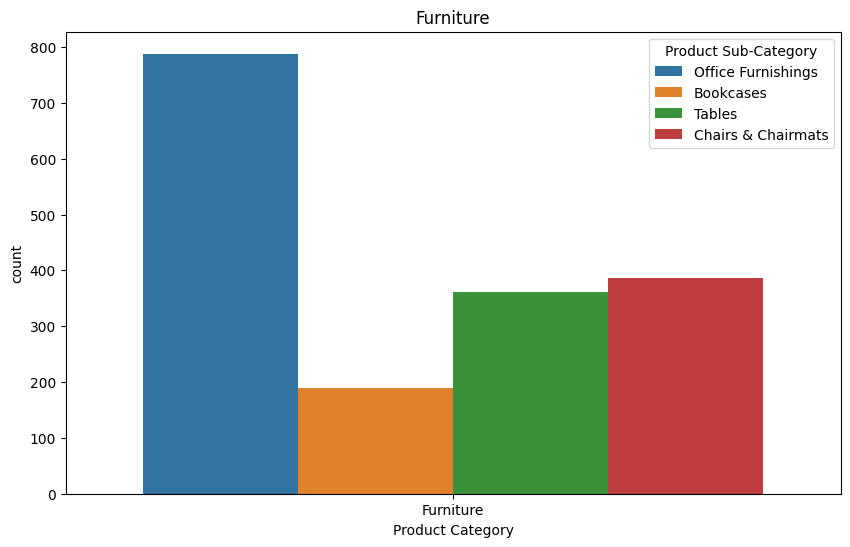

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=data[data["Product Category"]=="Furniture"] , x="Product Category" , hue="Product Sub-Category")
plt.title("Furniture")
plt.show()

# Year Wise Sales

In [19]:
data["Year"] = data["Order Date"].dt.year

In [20]:
data["Year"].value_counts()

Year
2009    2153
2010    2142
2012    2102
2011    2002
Name: count, dtype: int64

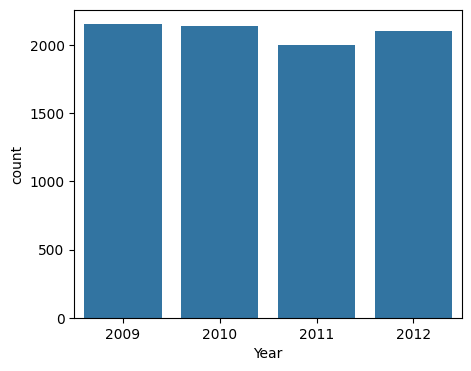

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(data=data , x="Year")
plt.show()

# Category Wise Profit

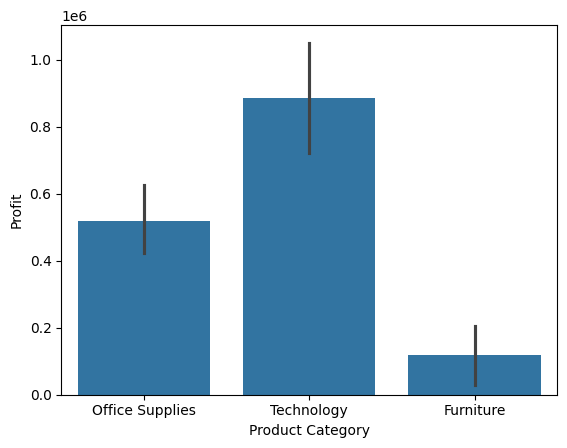

In [22]:
sns.barplot(data=data , x="Product Category" , y="Profit", estimator='sum')
plt.show()

# Product Base Margine

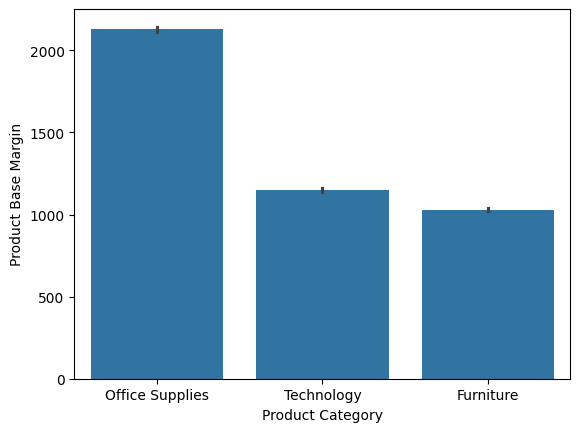

In [23]:
sns.barplot(data=data , x="Product Category" , y="Product Base Margin", estimator='sum')
plt.show()